# Códigos de bloco

In [1]:
!pip install komm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 974.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for komm: filename=komm-0.7.1-py3-none-any.whl size=56606 sha256=fb0ec6f786005b4825368351a4d499fa73390b78be396b314dac56bad327786e
  Stored in directory: /root/.cache/pip/wheels/5b/7b/63/2f1b1fb0cccdd5c0c35a845f226facdbbf8360d353a1deac5a
Successfully built komm


In [2]:
import numpy as np
import komm
import matplotlib.pyplot as plt

In [3]:
cod = komm.BlockCode(parity_submatrix=[[0, 1, 1], [1, 0, 1], [1, 1, 0]])

In [4]:
(n, k, d) = (cod.length, cod.dimension, cod.minimum_distance)
print(n, k, d)

6 3 3


In [5]:
G = cod.generator_matrix
H = cod.parity_check_matrix

In [6]:
cod.codeword_table

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 0]])

In [7]:
cod.codeword_weight_distribution  # A_w

array([1, 0, 0, 4, 3, 0, 0])

In [8]:
LUT = cod.coset_leader_table

In [9]:
cod.coset_leader_weight_distribution  # α_w

array([1, 6, 1, 0, 0, 0, 0])

In [10]:
b = np.array([1, 0, 0, 1, 1, 0])
# s = (b @ H.T) % 2
# idx = komm.binlist2int(s)
# e_hat = LUT[idx, :]
# v_hat = (b + e_hat) % 2
# u_hat = v_hat[:k]
# u_hat
u_hat = cod.decode(b, 'syndrome_table')
u_hat

array([1, 1, 0])

## Curva de BER (bit error rate)

In [11]:
Ncw = 10000
code = komm.HammingCode(3)
mod = komm.PSKModulation(2)
awgn = komm.AWGNChannel()
EbNo_dB = np.arange(-1.0, 8.0)
EbNo = 10.0**(EbNo_dB / 10.0)

(n, k, R) = (code.length, code.dimension, code.rate)
u = np.random.randint(0, 2, size=(Ncw, k))
v = np.apply_along_axis(code.encode, axis=1, arr=u)
v_seq = v.flat[:]
x = mod.modulate(v_seq)

decode_hard = lambda x: code.decode(x, method='syndrome_table')
decode_soft = lambda x: code.decode(x, method='exhaustive_search_soft')

BER_hard = []
BER_soft = []
for gamma in EbNo:
    awgn.snr = gamma * R  # Modulação complexa.
    y = awgn(x)

    # HDD
    b_seq = mod.demodulate(y)
    b = np.reshape(b_seq, newshape=(Ncw, -1))
    u_hat = np.apply_along_axis(decode_hard, axis=1, arr=b)
    BER_hard.append(np.mean(np.bitwise_xor(u, u_hat)))

    # SDD
    sb_seq = y  #mod.demodulate(y, decision_method='soft')
    sb = np.reshape(sb_seq, newshape=(Ncw, -1))
    u_hat = np.apply_along_axis(decode_soft, axis=1, arr=sb)
    BER_soft.append(np.mean(np.bitwise_xor(u, u_hat)))


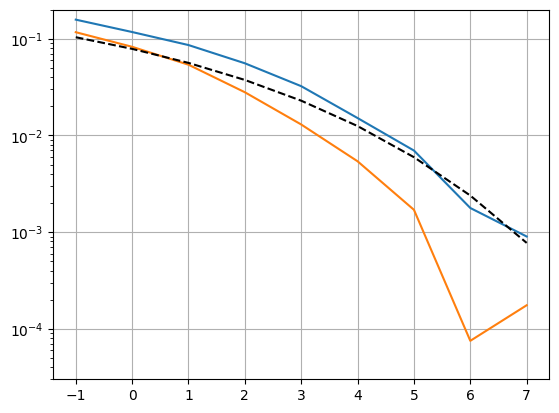

In [12]:
plt.semilogy(EbNo_dB, BER_hard)
plt.semilogy(EbNo_dB, BER_soft)
plt.semilogy(EbNo_dB, komm.qfunc(np.sqrt(2*EbNo)), 'k--')
plt.grid()
plt.ylim(3e-5, 0.2)
plt.show()

In [13]:
alpha = code.coset_leader_weight_distribution
print(alpha)

[1 7 0 0 0 0 0 0]


In [14]:
A = code.codeword_weight_distribution
print(A)

[1 0 0 7 7 0 0 1]
